In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

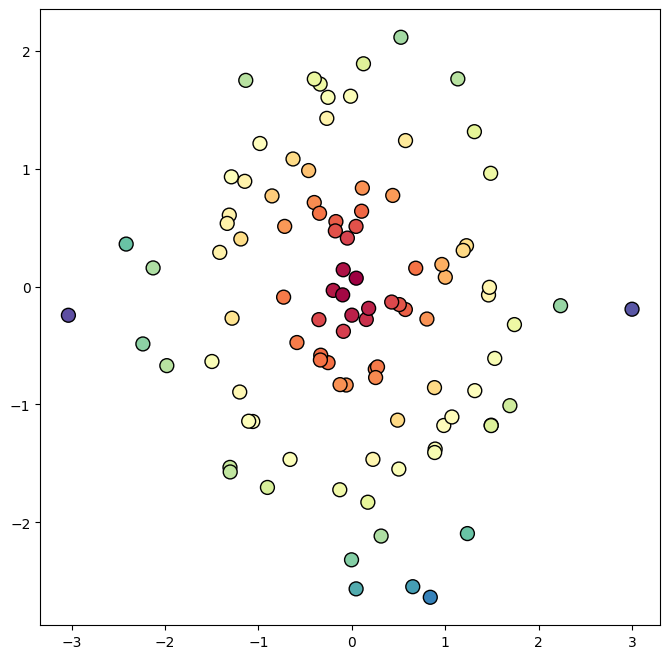

In [7]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='Spectral',edgecolors='k')

In [8]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

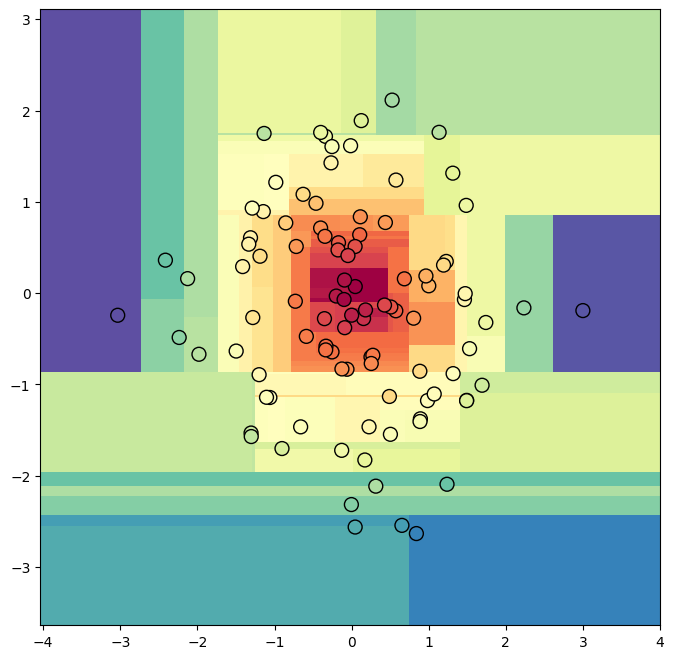

In [9]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='Spectral',edgecolors='k')

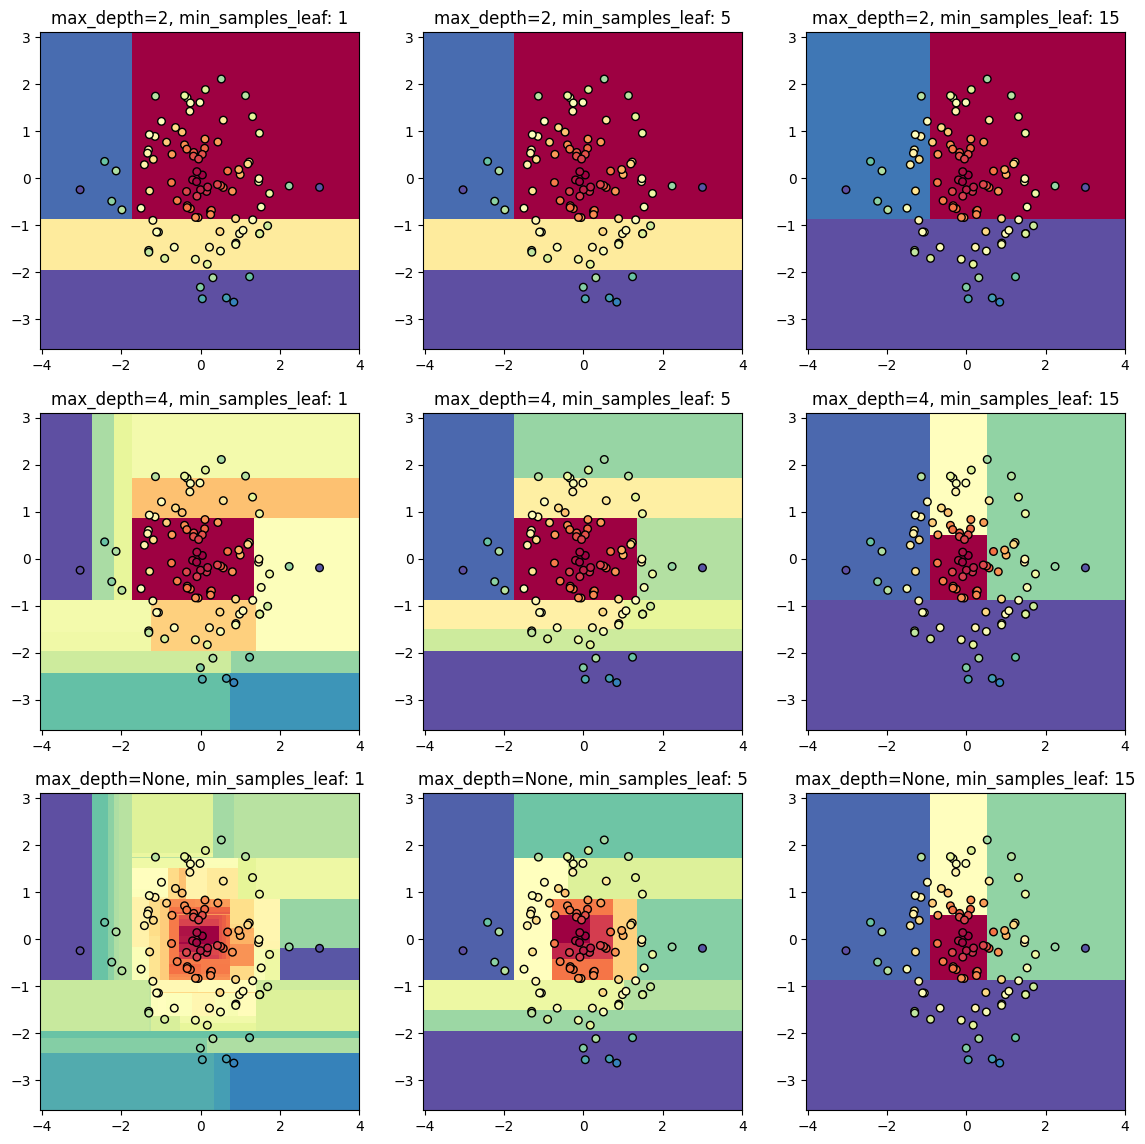

In [10]:
plt.figure(figsize=(14, 14))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='Spectral',edgecolors='k')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

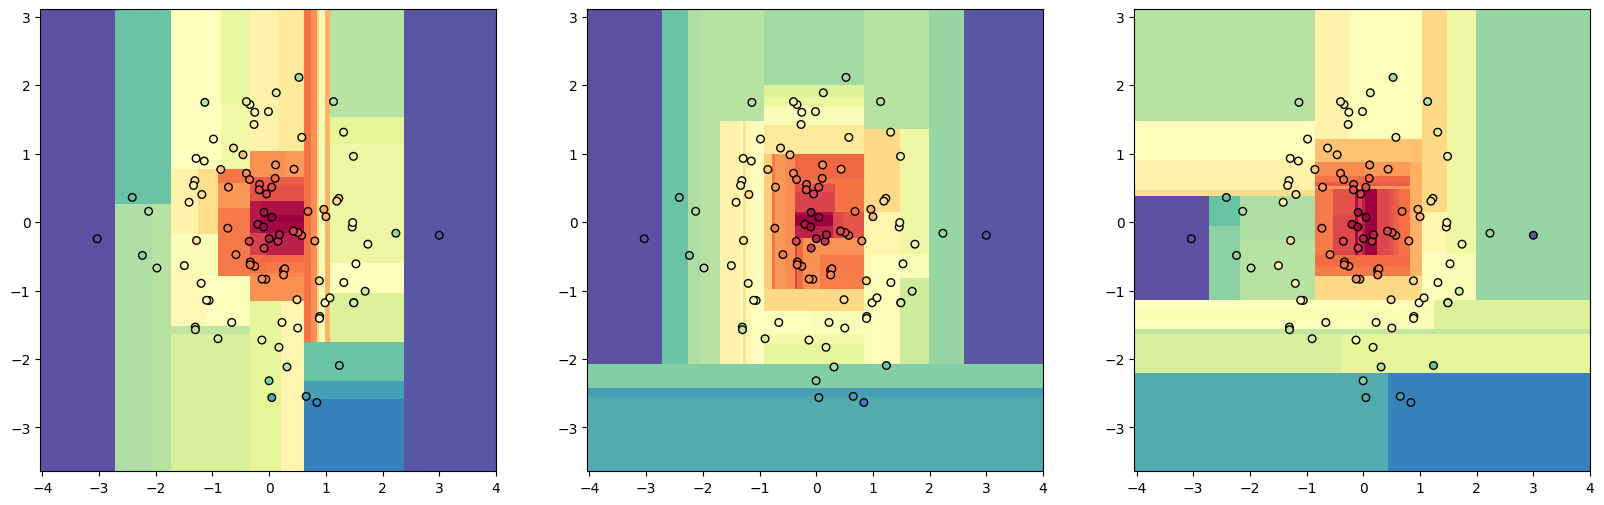

In [11]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='Spectral')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='Spectral',edgecolors='k')

In [20]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)
#data = boston.data
X_full = boston.data
y_full = boston.target

In [21]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=42)

In [22]:
X.shape,X_test.shape

((406, 13), (100, 13))

In [23]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(5, shuffle=True, random_state=42)

In [24]:
regr = DecisionTreeRegressor(random_state=42)
print(-cross_val_score(regr, X, y, cv=cv, scoring='neg_mean_squared_error').mean())

25.87087052092743


In [25]:
regr = DecisionTreeRegressor(random_state=42)
print(cross_val_score(regr, X, y, cv=cv, scoring='r2').mean())

0.6830005313738446
